In [1]:
import pandas as pd

In [3]:
import numpy as np

In [13]:
train_X=pd.read_csv("https://raw.githubusercontent.com/Datamanim/jeju/main/jeju_train_X.csv")
train_y=pd.read_csv("https://raw.githubusercontent.com/Datamanim/jeju/main/jeju_train_y.csv")
test_X=pd.read_csv("https://raw.githubusercontent.com/Datamanim/jeju/main/jeju_test_X.csv")
test_y=pd.read_csv("https://raw.githubusercontent.com/Datamanim/jeju/main/jeju_test_y.csv")

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf = RandomForestRegressor()
rf.fit(train_X.drop('index',axis=1),train_y)

<ipython-input-53-b447b9c43f5c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_X.drop('index',axis=1),train_y)


RandomForestRegressor()

In [54]:
pr= rf.predict(test_X.drop('index',axis=1))

In [55]:
mean_squared_error(test_y['이용금액'], pr)

0.004213268415744757

In [56]:
import matplotlib.pyplot as plt

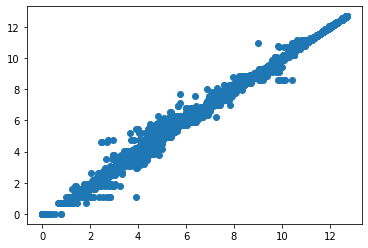

In [71]:
plt.scatter(pr,test_y['이용금액'])

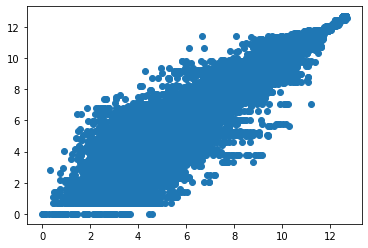

In [90]:
plt.scatter(pr,test_y['이용금액'])

In [72]:
train_X['target'] =1
test_X['target'] =0
total = pd.concat([train_X,test_X])

In [73]:
total['date']  =pd.to_datetime('20'+total['년도'].astype('str') +"-" + total['월'].astype('str')+'-' + total['일'].astype('str'))

In [74]:
total

,index,시도명,읍면동명,평균 기온,일강수량,최대 풍속,업종명,년도,월,일,target,date
0,0,0,2,12.6,0.0,1.8,0,19,8,31,1,2019-08-31
1,1,0,36,8.9,0.0,2.3,0,19,4,1,1,2019-04-01
2,2,1,16,11.6,0.0,2.6,0,18,10,20,1,2018-10-20
3,3,1,12,28.2,0.0,1.8,0,18,8,10,1,2018-08-10
4,4,0,36,20.6,1.0,1.6,0,18,5,29,1,2018-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...
71927,239754,1,24,0.1,0.0,3.7,3,19,12,31,0,2019-12-31
71928,239755,1,26,2.6,0.0,12.2,2,19,12,31,0,2019-12-31
71929,239756,1,1,0.4,0.0,6.2,5,19,12,31,0,2019-12-31
71930,239757,1,12,0.9,0.0,6.6,0,19,12,31,0,2019-12-31


In [75]:
def weekend(x):
    if x in [5,6]:
        return 1
    else:
        return 0

In [76]:
total['weekend']  = total.date.dt.weekday.apply(weekend)

In [77]:
dum_col = ['시도명','읍면동명','weekend','업종명']
drop_col = ['index','date','년도','월','일']

In [78]:
total[dum_col] = total[dum_col].astype('str')

In [79]:
dum_total = pd.get_dummies(total)

In [80]:
dum_drop = dum_total.drop(drop_col,axis=1)
dum_train = dum_drop[dum_drop.target==1].drop('target',axis=1)
dum_test = dum_drop[dum_drop.target==0].drop('target',axis=1)

In [81]:
dum_train

,평균 기온,일강수량,최대 풍속,시도명_0,시도명_1,읍면동명_0,읍면동명_1,읍면동명_10,읍면동명_11,읍면동명_12,...,업종명_2,업종명_3,업종명_4,업종명_5,업종명_6,업종명_7,업종명_8,업종명_9,weekend_0,weekend_1
0,12.6,0.0,1.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,8.9,0.0,2.3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,11.6,0.0,2.6,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,28.2,0.0,1.8,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,20.6,1.0,1.6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167822,21.6,2.0,2.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
167823,17.3,0.0,1.6,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
167824,20.7,0.0,2.2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
167825,17.5,0.0,2.4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(dum_train, train_y, test_size=0.3, random_state=42)

In [84]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

<ipython-input-84-2a968e16886f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestRegressor()

In [85]:
y_pred = rf.predict(X_test)

In [86]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_pred)

0.48578426390647766

In [87]:
pd.DataFrame(y_pred).describe()

,0
count,50349.000000
mean,7.079492
std,2.342899
min,0.016094
25%,5.190182
50%,6.987340
75%,8.819255
max,12.663768


In [88]:
pr= rf.predict(dum_test)

In [89]:
sub = test_y.copy()
sub['이용금액'] =pr

In [49]:
mean_squared_error(test_y['이용금액'], pr)

0.49630315574895517